In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data.ndim)
print(train_data.shape)
print(train_data.dtype)
print(train_labels)
print(train_data[0])

1
(8982,)
object
[ 3  4  3 ..., 25  3 25]
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
word_index = reuters.get_word_index()

reverse_word_index = dict((value,key) for (key,value) in word_index.items())
decoded_newswire = " ".join(reverse_word_index.get(i-3,'?') for i in train_data[0])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
import numpy as np

def vectorizer(seqs , length=10000):
    res = np.zeros((len(seqs),length))
    for i,seq in enumerate(seqs):
        res[i,seq] = 1
    return res

x_train = vectorizer(train_data)
x_test = vectorizer(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    res = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        res[i,label] = 1
    return res

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Another way to do one hot encoding


In [7]:
from keras.utils import to_categorical

one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels = to_categorical(train_labels)

# You may preprocess labels as integers instead of one hot

In [8]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [9]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy", #for one hot encoded labels
#               loss="sparse_categorical_crossentropy", #for integer labels
              metrics=['acc'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] # for one hot encoded labels
partial_y_train = one_hot_train_labels[1000:] # for one hot encoded labels

# y_val = y_train[:1000]  #for integer labels
# partial_y_train = y_train[1000:]  #for integer labels

In [11]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 247us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 213us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 206us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

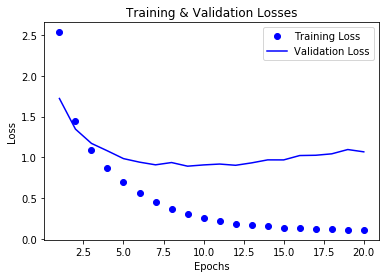

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

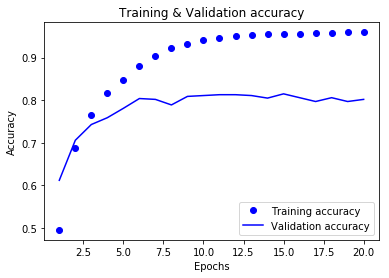

In [14]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 167us/step


[1.2092601955733124, 0.77871772044488397]

In [16]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.argmax(predictions[0]))
print(np.sum(predictions[0]))

(46,)
3
1.0
